# 12 Clipping

In this lesson we will learn how to to clip different geometries.

## About the data

We will use three datasets in this lesson. 

The first dataset is a [TIGER shapefile of the US states from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). Follow these steps to download shapefile with the United States' states:

You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 

The second dataset we'll use is [Natural Earth's simple medium scale populated places dataset](https://www.naturalearthdata.com/downloads/50m-cultural-vectors/). We can obtain this dataset by downloading the shapefile (choose the one that says "simple (less columns)").

The third dataset we'll use is [Natural Earth's road dataset](https://www.naturalearthdata.com/downloads/10m-cultural-vectors/roads/). 
We can obtain this dataset by downloading the shapefile 

We will combine these datasets to create the following map of infrastructure in Alaska:

## Import data

Let's start by loading our libraries and then importing the datasets we will use.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

"""
Set environment variable 'PROJ_LIB' to specify the path for the PROJ library
Resolves ERROR 1: PROJ: proj_create_from_database
"""""
os.environ['PROJ_LIB'] = '/opt/anaconda3/share/proj'

pd.set_option("display.max.columns", None)

# -------------------------------------------------------
# Import data

# Path to course data folder
data_folder_fp = os.path.join('/',
                              'courses',
                              'EDS220', 
                              'data')

# Import and simplify states polygons
states = gpd.read_file(os.path.join(data_folder_fp, 
                                    'tl_2022_us_state', 
                                    'tl_2022_us_state.shp'))

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join(data_folder_fp,
                                    'ne_50m_populated_places',
                                    'ne_50m_populated_places.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join(data_folder_fp,
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

## Check-in
Use a for loop to iterate over the three geo-dataframes we imported and change their column names to lower caps.

In [2]:
# My solution
gdfs = [states, places, roads]

for i in gdfs:
    i.columns = i.columns.str.lower()

In [4]:
# Carmen's solution
for df in [states, places, roads]:
    df.columns = df.columns.str.lower()

## Prepare Alaska multipolygon

This is a geospatial dataset, you should always *at least* check the following:

CRS, plotting the data, and head of the dataset

In [5]:
states.crs

<Geographic 2D CRS: GEOGCS["GCS_North_American_1983",DATUM["D_North_Am ...>
Name: NAD83
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
states.head(1)

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."


<Axes: >

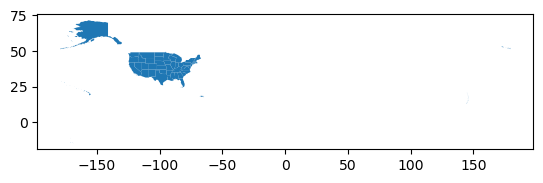

In [7]:
states.plot()

For this lesson, we are interested in plotting data in Alaska only.

<Axes: >

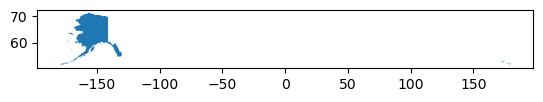

In [9]:
alaska = states[states.name == "Alaska"]
alaska.plot()

Notice that multipolygon is plotted under the NAD83 / EPSG:4269 CRS (common for US agency data) and this unnaturally elongates the map.

Let's reproject to EPSG:3338, this is a **projected** CRS.

In [11]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect new CRS
print('Is this CRS project?', alaska.crs.is_projected)
alaska.crs

Is this CRS project? True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

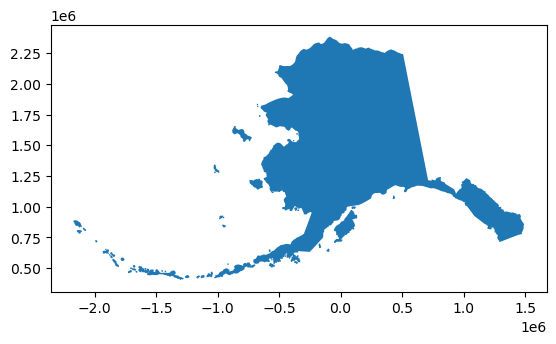

In [12]:
alaska.plot()

## Prepare populated places points

Let's explore the data:


In [13]:
places.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
places.head(1)

,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,max_pop10,max_pop20,max_pop50,max_pop300,max_pop310,max_natsca,min_areakm,max_areakm,min_areami,max_areami,min_perkm,max_perkm,min_permi,max_permi,min_bbxmin,max_bbxmin,min_bbxmax,max_bbxmax,min_bbymin,max_bbymin,min_bbymax,max_bbymax,mean_bbxc,mean_bbyc,timezone,un_fid,pop1950,pop1955,pop1960,pop1965,pop1970,pop1975,pop1980,pop1985,pop1990,pop1995,pop2000,pop2005,pop2010,pop2015,pop2020,pop2025,pop2050,min_zoom,wikidataid,wof_id,capalt,name_en,name_de,name_es,name_fr,name_pt,name_ru,name_zh,label,name_ar,name_bn,name_el,name_hi,name_hu,name_id,name_it,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,ne_id,name_fa,name_he,name_uk,name_ur,name_zht,geonamesid,fclass_iso,fclass_us,fclass_fr,fclass_ru,fclass_es,fclass_cn,fclass_tw,fclass_in,fclass_np,fclass_pk,fclass_de,fclass_gb,fclass_br,fclass_il,fclass_ps,fclass_sa,fclass_eg,fclass_ma,fclass_pt,fclass_ar,fclass_jp,fclass_ko,fclass_vn,fclass_tr,fclass_id,fclass_pl,fclass_gr,fclass_it,fclass_nl,fclass_se,fclass_bd,fclass_ua,fclass_tlc,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.5333,75000,21000,0.0,8,7,None,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,Q4940747,1141906025,0,Bombo,Bombo,Bombo,Bombo,Bombo,Бомбо,邦博,None,بومبو,বোম্বো,Μπόμπο,बॉम्बो,Bombo,Bombo,Bombo,ボンボ,봄보,Bombo,Bombo,Bombo,Bombo,Bombo,1159113923,بمبو,בומבו,Бомбо,بومبو,邦博,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,POINT (32.53330 0.58330)


<Axes: >

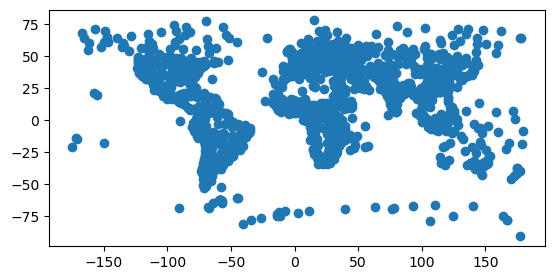

In [15]:
places.plot()

This dataset is in WGS 84 / EPSG: 4326 CRS.
This is the most widely used CRS for global data.

Let's try to plot it on top of Alaska

<Axes: >

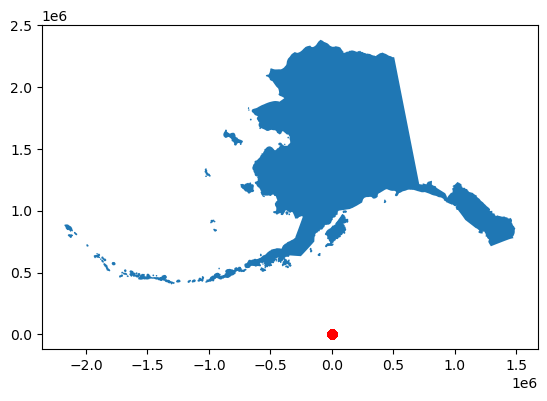

In [16]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red')

** If your data is in weird places, check that the CRS's match **

Let's update the CRS's using an `if-else` statement:

In [18]:
if alaska.crs == places.crs:
    print('CRSs match')
else:
    places = places.to_crs(alaska.crs)
    assert places.crs == alaska.crs
    print('We matched the CRSs')

We matched the CRSs


Remember that an `if-else` statement a control structure that allows code to make decisions:
- it checks a condition,
- if that condition is true, it executes one block of code (the `if` block)
- if that condition is false, it executes a different block of code (the `else` block)

<Axes: >

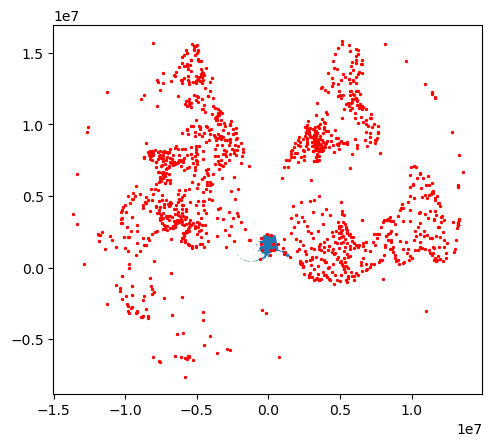

In [20]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red', markersize=2)

## Clipping

**clipping** means using a polygon (or polygons) to select only geospatial data within them.
This is simple with a `geopandas.GeoDataFrame` using the `clip()` function:

``` python
updated_geodf = geopandas.clip(geodf, mask)
```

where
- `updated_geodf` = output of the method, the **intersection** of the geometries in `geodf` with the `mask`
- `geodf` = `gpd.geodf` we want to clip
- `mask` = `gpd.geodf` with the polygons we want to use for clipping. The masks needs to be in the same CRS as the geodf

In our case:

In [21]:
# Clip the populated places to Alaska multipolygon
ak_places = gpd.clip(places, alaska)

<Axes: >

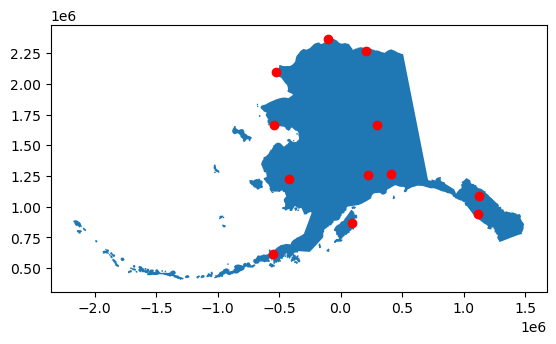

In [25]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
ak_places.plot(ax = ax, color = 'red')

## Prepare roads data

In [26]:
roads.crs

<Geographic 2D CRS: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84" ...>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
roads.head(1)

,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."


<Axes: >

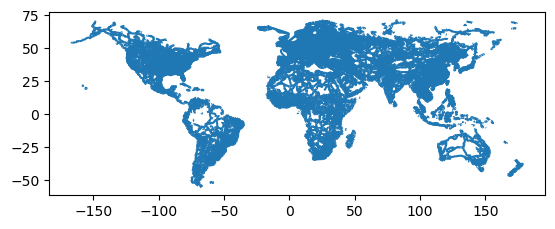

In [28]:
roads.plot()

Before clipping or reprojecting, we will subset the data to select only US roads.

** BEST PRACTICE **
Reduce your tabular data before reducing via geometries.



<Axes: >

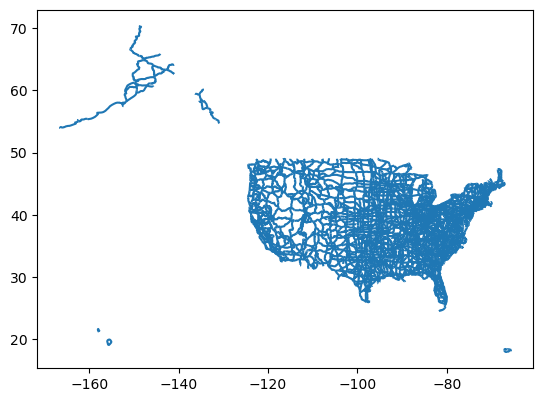

In [30]:
usa_roads = roads[roads.sov_a3 == "USA"]
usa_roads.plot()

We will now compose function to clip `usa_roads` and `alaska` multipolygon.



<Axes: >

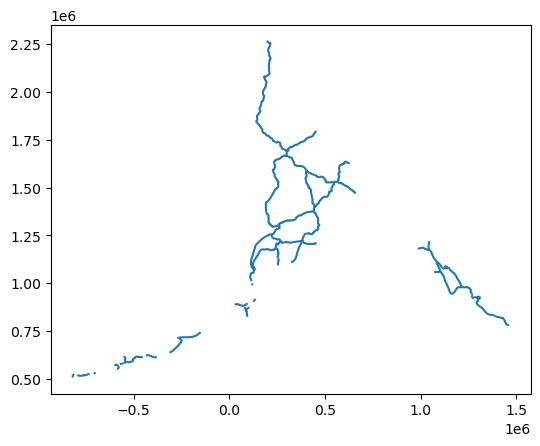

In [32]:
# Clip usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)
ak_roads.plot()

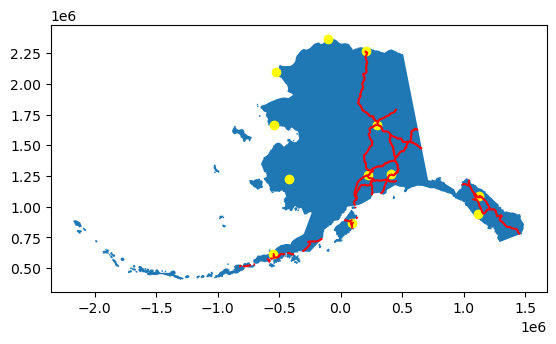

In [35]:
fig, ax = plt.subplots()

alaska.plot(ax = ax)
ak_roads.plot(ax = ax, color = 'red')
ak_places.plot(ax = ax, color = 'yellow')

plt.show()


Notice that in the above plot, it removes the bridges between islands.


## Clip with a bounding box

We will clip the `usa_roads` geodataframe with the **bounding box*** of `alaska` instead of it's polygons.

To create a bounding box, we will use the `box()` function from `shapely.geometry`. The syntax for the box is:

``` python
box(minx, miny, maxx, maxy)
```

The output is a polygon representing a box constructed like this:

SHOW DIAGRAM


If we want to create a `shapely` polygon from the bounds of a geodf `gdf`, we can use this syntax:

``` python
box(*gdf.total_bounds)
```

In [37]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816])

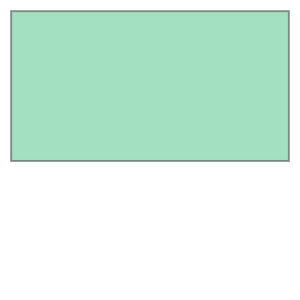

In [39]:
box(-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520816)

In [40]:
bbox = box(*alaska.total_bounds)
print(type(bbox))

<class 'shapely.geometry.polygon.Polygon'>


### * = unpacking operator

in the last syntax, we used `*` as an **unpacking operator** on the array `alaska.total_bounds`. Think about it as unpacking the elements of `alaska.total_bounds` and passing them one-by-one to the parameters `minx`, `miny`, `maxx`, and `maxy` of the `box()` function

In [43]:
# Create a geodataframe from the bounding box
ak_bbox = gpd.GeoDataFrame(geometry = [bbox], # Assign a geometry column
                          crs = alaska.crs) # Assign CRS

print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


In [45]:
# Clip roads using Alaska bounding box
ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

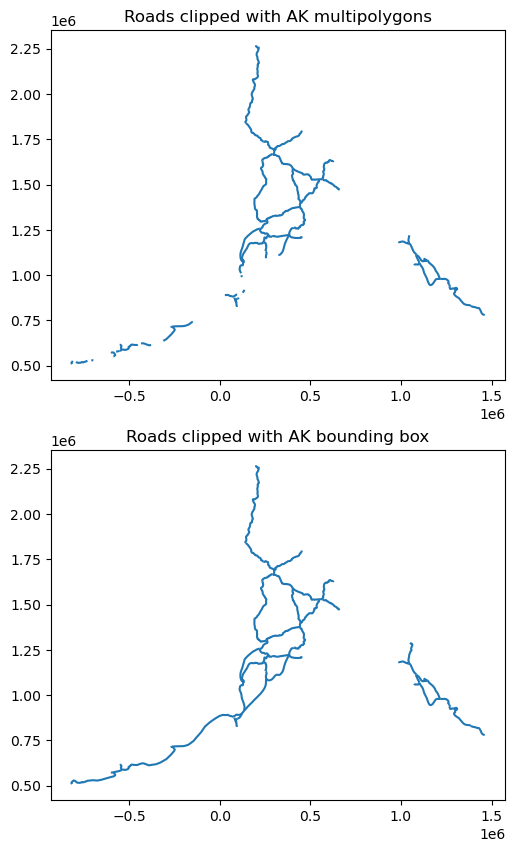

In [48]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clipped with AK multipolygons')

ak_complete_roads.plot(ax = ax2)
ax2.set_title('Roads clipped with AK bounding box')

plt.show()

Let's plot all the layers together

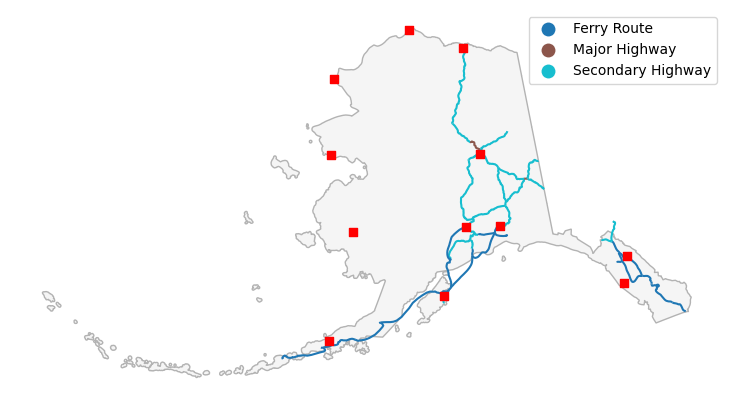

In [57]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color = 'whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax,
                       zorder=1, # Specify the layer plotting order
                      column='type',
                      legend=True)

ak_places.plot(ax=ax,
               zorder=2,
              color='red',
              marker='s' # square marker
              )

plt.show()

Notice the overlaying labels for Anchorage and Valdez:



Update the map so these labels do not overlap. One way to do it is using an if when iterating over the Alaska populated places.

TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]

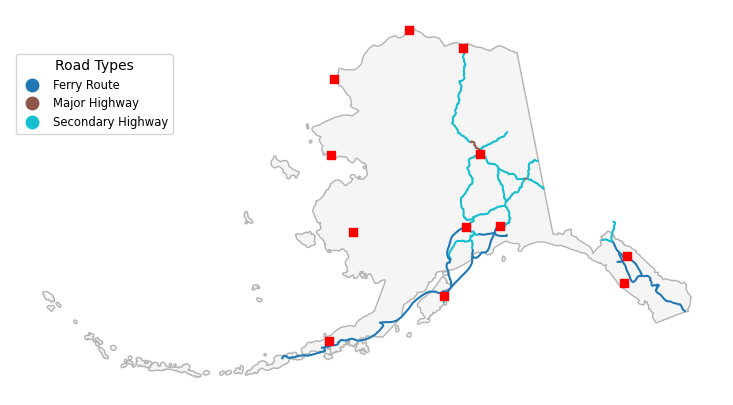

In [73]:
# My attempt
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
if (ak_places.name ==  'Anchorage' | ak_places.name == 'Valdez'):
    for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
        ax.text(x-40000, y+30000, name, fontsize=8, ha='right')
else:
    for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')
    

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

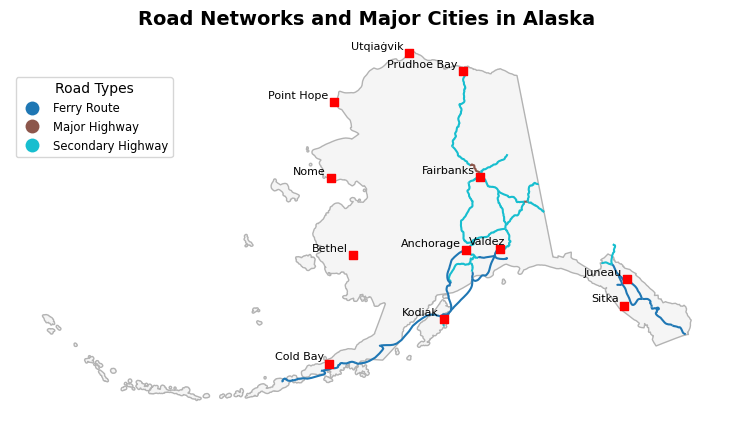

In [78]:
# Carmen's solution
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name != 'Valdez': # skip valdez
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')
#    else:
#        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

# Plot Valdez point individually
valdez = ak_places[ak_places['name'] == 'Valdez']
ax.text(valdez.geometry.x.iloc[0]+30000,
       valdez.geometry.y.iloc[0]+20000,
       'Valdez',
       fontsize=8,
       ha='right')


ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()